IMPORT LIBRARY

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)

LOAD DATASET

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
df = pd.read_csv("/content/gdrive/MyDrive/1.Kuliah/Semester-7/Machine_Learning/Praktikum/Praktikum10/Data/weather_classification_data.csv")

df.head()
print("Data lengkap:")
print(df)

Data lengkap:
       Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Vi

In [9]:
print(df.info())
print(df['Weather Type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


MEMISAHKAN DATA TRAINING DAN TESTING

In [10]:
df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['Weather Type']   # pembagian seimbang
)

print("Ukuran df_train:", df_train.shape)
print("Ukuran df_test :", df_test.shape)

Ukuran df_train: (10560, 11)
Ukuran df_test : (2640, 11)


DATA CLEANING

In [11]:
print("Cloud Cover:", df_train['Cloud Cover'].unique())
print("Season     :", df_train['Season'].unique())
print("Location   :", df_train['Location'].unique())
print("Weather Type:", df_train['Weather Type'].unique())

Cloud Cover: ['overcast' 'partly cloudy' 'clear' 'cloudy']
Season     : ['Winter' 'Summer' 'Spring' 'Autumn']
Location   : ['mountain' 'inland' 'coastal']
Weather Type: ['Snowy' 'Sunny' 'Rainy' 'Cloudy']


MAPPING NILAI KATEGORIKAL MENJADI NUMERIK

In [26]:
replacements = {
    'Cloud Cover': {
        'clear': 0,
        'partly cloudy': 1,
        'cloudy': 2,
        'overcast': 3
    },
    'Season': {
        'Winter': 0,
        'Spring': 1,
        'Summer': 2,
        'Autumn': 3
    },
    'Location': {
        'inland': 0,
        'coastal': 1,
        'mountain': 2
    },
    # label / target
    'Weather Type': {
        'Sunny': 0,
        'Cloudy': 1,
        'Rainy': 2,
        'Snowy': 3
    }
}

ENCODING

In [13]:
# Encoding pada data train
df_train = df_train.replace(replacements, inplace=False)
df_train.head()

# Encoding pada data test
df_test = df_test.replace(replacements, inplace=False)
df_test.head()

/tmp/ipython-input-1339108832.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace(replacements, inplace=False)
/tmp/ipython-input-1339108832.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace(replacements, inplace=False)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
10788,26.0,72,9.0,69.0,1,996.40,3,0,4.0,0,2
10052,31.0,71,13.0,46.0,1,1005.38,3,0,5.5,1,1
7071,38.0,51,0.5,1.0,0,1016.26,11,2,5.0,0,0
9156,17.0,82,16.5,68.0,3,1005.12,0,0,2.0,0,2
3837,46.0,102,8.0,105.0,1,1016.57,4,0,10.5,2,1


MELIHAT MISSING VALUE

In [14]:
# Cek missing value
print("Missing value df_train:")
print(df_train.isna().sum())
print("\nMissing value df_test:")
print(df_test.isna().sum())

Missing value df_train:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Missing value df_test:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


ANALISIS KORELASI FITUR

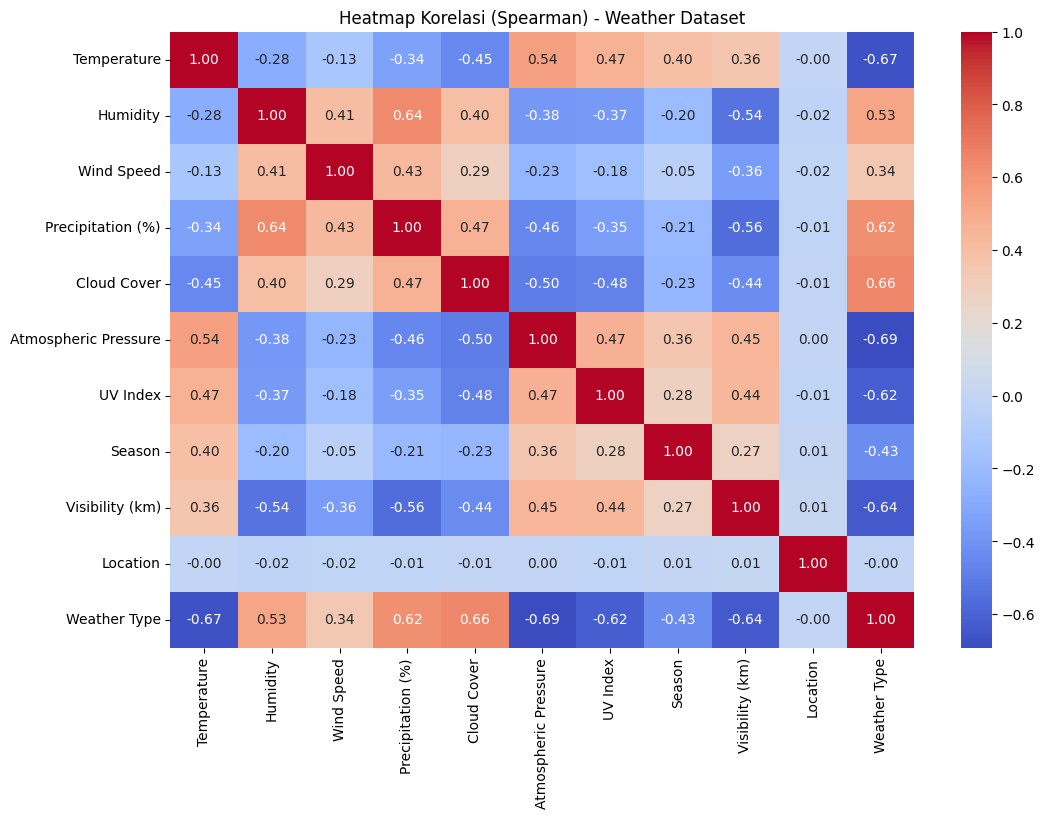

In [15]:
correlation_matrix = df_train.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap Korelasi (Spearman) - Weather Dataset")
plt.show()

VISUALISASI DISTRIBUSI LABEL

/tmp/ipython-input-4245175239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather Type', data=df_train, palette='Set2')


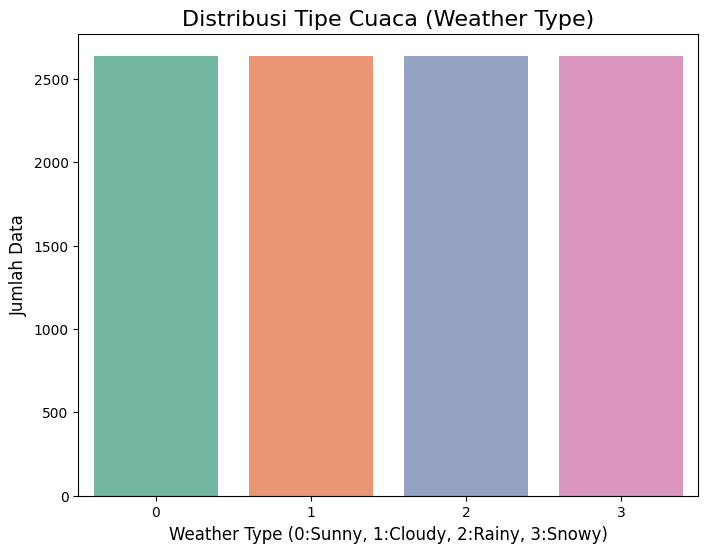

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather Type', data=df_train, palette='Set2')

plt.title('Distribusi Tipe Cuaca (Weather Type)', fontsize=16)
plt.xlabel('Weather Type (0:Sunny, 1:Cloudy, 2:Rainy, 3:Snowy)', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.show()

TAHAP MODELING

PEMISAHAN DATA DAN NORMALISASI

In [17]:
# data yang dilatih
x_train = df_train.drop(columns=['Weather Type'])
y_train = df_train['Weather Type']

# data uji
x_test = df_test.drop(columns=['Weather Type'])
y_test = df_test['Weather Type']

# normalisasi
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

MENANGANI KETIDAKSEIMBANGAN KELAS DENGAN SMOTE

In [18]:
print("Sebelum SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1)
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

print("\nSesudah SMOTE:")
print(y_train_smote.value_counts())

Sebelum SMOTE:
Weather Type
3    2640
0    2640
2    2640
1    2640
Name: count, dtype: int64

Sesudah SMOTE:
Weather Type
3    2640
0    2640
2    2640
1    2640
Name: count, dtype: int64


MENENTUKAN PARAMETER TERBAIK MENGGUNAKAN HYPERPARAMETER TUNING

In [19]:
param_grid = {
    'n_neighbors': list(range(1, 16)),
    'weights': ['uniform'],
    'metric': ['euclidean'],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=3,
    n_jobs=-1
)

grid.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform']})

MODEL KNN TERBAIK DAN MELAKUKAN PREDIKSI

In [20]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_smote, y_train_smote)

# Prediksi data uji
y_pred = best_knn.predict(x_test_scaled)

EVALUASI MODEL DENGAN CLASSFICATION REPORT

In [21]:
print("\nClassification Report (per kelas):")
print(classification_report(y_test, y_pred))


Classification Report (per kelas):
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       660
           1       0.87      0.88      0.87       660
           2       0.88      0.89      0.89       660
           3       0.94      0.90      0.92       660

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



ACCURACY, PRECISION, RECALL

In [22]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall    = recall_score(y_test, y_pred, average='macro')

print(f"Akurasi  : {accuracy*100:.2f}%")
print(f"Precision (macro): {precision*100:.2f}%")
print(f"Recall (macro)   : {recall*100:.2f}%")

Akurasi  : 89.58%
Precision (macro): 89.64%
Recall (macro)   : 89.58%


EVALUASI DENGAN CONFUSION MATRIX

Confusion Matrix:
           Pred Sunny  Pred Cloudy  Pred Rainy  Pred Snowy
Sunny(0)          600           27          24           9
Cloudy(1)          29          579          42          10
Rainy(2)           19           32         589          20
Snowy(3)           19           30          14         597


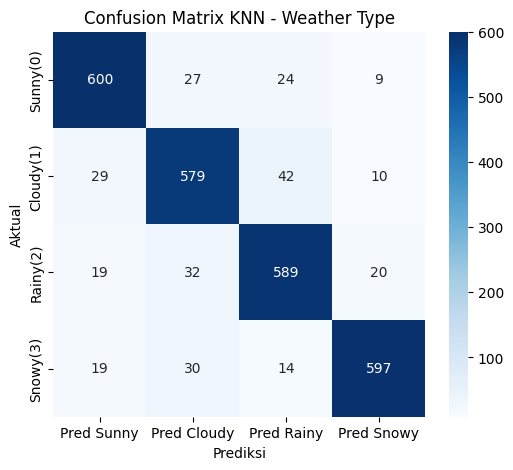

In [23]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index=['Sunny(0)', 'Cloudy(1)', 'Rainy(2)', 'Snowy(3)'],
    columns=['Pred Sunny', 'Pred Cloudy', 'Pred Rainy', 'Pred Snowy']
)

print("Confusion Matrix:")
print(cm_df)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix KNN - Weather Type")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

VALIDASI MODEL DENGAN CROSS VALIDATION

In [24]:
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)
print("Cross Validation Accuracy (mean):", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy (mean): 0.8936553030303029
Std Dev: 0.0042729220351054985


MENENTUKAN NILAI K OPTIMAL DENGAN ELBOW METHOD

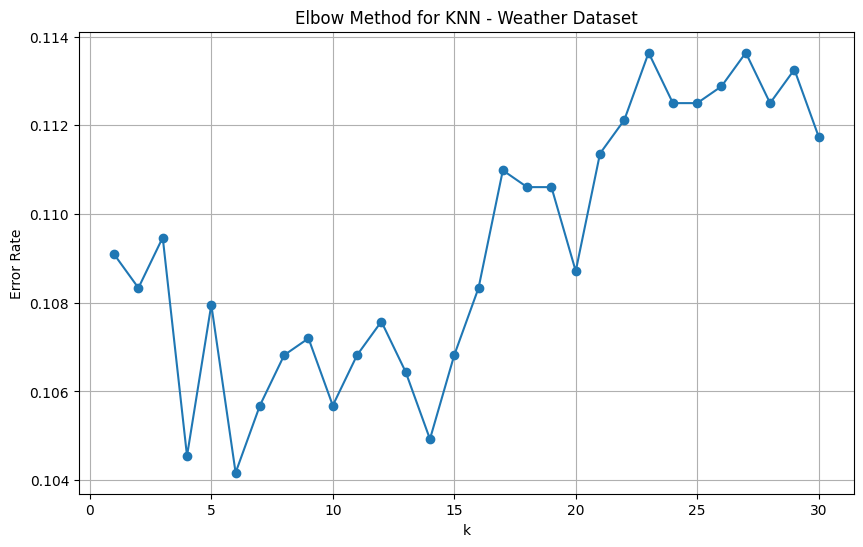

In [25]:
errors = []

for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_train_smote, y_train_smote)
    pred = knn_temp.predict(x_test_scaled)
    errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), errors, marker='o')
plt.title("Elbow Method for KNN - Weather Dataset")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()